# Exercise - Investigating Trending Skills

## Topics Covered

This exercise goes over:

* Applying Functions
* Exploding
* Pivoting
* Plotting

## Question

* How are skills trending for Data Analysts on a monthly basis.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Trends for Data Analyst Jobs
1. For this we're going to only be looking at data analyst jobs. So we'll create a copy of our original DataFrame that filters only for Data Analyst roles.

In [2]:
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()

2. Extract the month from the `job_posted_date`. 

In [3]:
df_DA["job_posted_month_no"] = df["job_posted_date"].dt.month

3. Explode the `job_skills` column.

In [4]:
df_DA_explode = df_DA.explode("job_skills")

3. Let's pivot the data to get the count (or size) of each skill for each month.

In [8]:
df_DA_pivot = df_DA_explode.pivot_table(index = "job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)
df_DA_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


4. We need to sort the skills to be in order of count to make it easier to plot the top X.

In [13]:
# Create a total row
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
# Order columns by total count
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_DA_pivot.loc["Total"] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc["Total"].sort_values(ascending=False).index]
# Drop total row
df_DA_pivot = df_DA_pivot.drop("Total")
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


5. (Optional) I like to have my months as names, not numbers, so let's change this.

In [17]:
# code snippet from `6_Exercise_Job_Demand.ipynb`
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot["job_posted_month"] = df_DA_pivot["job_posted_month_no"].apply(lambda x : pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_pivot = df_DA_pivot.set_index("job_posted_month")
df_DA_pivot

job_skills,index,job_posted_month_no,sql,excel,python,tableau,power bi,r,sas,powerpoint,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0,1,11336,8170,6606,5596,4285,3607,3830,1880,...,2,0,0,1,0,0,0,1,0,0
Feb,1,2,7947,5772,4751,3936,3307,2576,2634,1291,...,0,0,0,0,0,0,0,0,0,0
Mar,2,3,7868,5675,4741,4051,3176,2650,2554,1266,...,0,1,0,0,0,0,1,0,0,0
Apr,3,4,7553,5496,4557,3776,3106,2399,2598,1190,...,0,0,0,0,1,0,0,0,0,0
May,4,5,6617,4773,4070,3245,2695,2093,1940,979,...,0,0,0,0,0,0,0,0,0,1
Jun,5,6,7584,5724,4707,3812,3275,2442,2174,1173,...,0,0,0,0,0,0,0,0,0,0
Jul,6,7,7687,5513,4831,3928,3350,2444,2118,1096,...,0,0,1,0,0,0,0,0,0,0
Aug,7,8,8823,6482,5576,4533,3859,2975,2560,1332,...,0,0,0,0,0,0,0,0,0,0
Sep,8,9,6829,4886,4229,3446,3118,2146,1880,944,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot["job_posted_month"] = df_DA_pivot["job_posted_month_no"].apply(lambda x : pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_pivot = df_DA_pivot.set_index("job_posted_month")
df_DA_pivot = df_DA_pivot.drop(columns="job_posted_month_no")
df_DA_pivot

job_skills,index,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0,11336,8170,6606,5596,4285,3607,3830,1880,1778,...,2,0,0,1,0,0,0,1,0,0
Feb,1,7947,5772,4751,3936,3307,2576,2634,1291,1235,...,0,0,0,0,0,0,0,0,0,0
Mar,2,7868,5675,4741,4051,3176,2650,2554,1266,1203,...,0,1,0,0,0,0,1,0,0,0
Apr,3,7553,5496,4557,3776,3106,2399,2598,1190,1177,...,0,0,0,0,1,0,0,0,0,0
May,4,6617,4773,4070,3245,2695,2093,1940,979,957,...,0,0,0,0,0,0,0,0,0,1
Jun,5,7584,5724,4707,3812,3275,2442,2174,1173,1237,...,0,0,0,0,0,0,0,0,0,0
Jul,6,7687,5513,4831,3928,3350,2444,2118,1096,1069,...,0,0,1,0,0,0,0,0,0,0
Aug,7,8823,6482,5576,4533,3859,2975,2560,1332,1298,...,0,0,0,0,0,0,0,0,0,0
Sep,8,6829,4886,4229,3446,3118,2146,1880,944,945,...,0,0,0,0,0,0,0,0,0,0


6. Let's graph the top 5 skills by count.

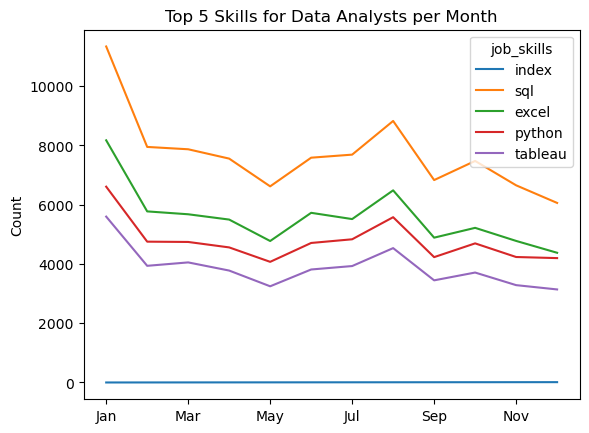

In [25]:
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()